# KNN algorithm

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [45]:
%matplotlib inline

In [113]:
# read csv file

data = pd.read_csv("D:/projects/glass.csv")
data.head()


,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# using Standardize the variables

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaler.fit(data.drop('Type', axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [50]:
features = scaler.transform(data.drop('Type', axis=1))

In [51]:
new_features = pd.DataFrame(features,columns=data.columns[:-1])

In [52]:
new_features

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451
...,...,...,...,...,...,...,...,...,...
209,-0.704815,0.898681,-1.865511,2.881125,-0.052974,-0.640968,0.157088,1.783978,-0.586451
210,-0.500178,1.856097,-1.865511,1.094342,0.529374,-0.763919,-0.392276,2.852405,-0.586451
211,0.754046,1.168721,-1.865511,1.154570,0.995252,-0.763919,-0.364103,2.953200,-0.586451
212,-0.612399,1.193270,-1.865511,0.993960,1.241133,-0.763919,-0.335931,2.812087,-0.586451


# train_test_split

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,data['Type'], test_size=0.30)

# KNN building

In [54]:
from sklearn.neighbors import KNeighborsClassifier

In [114]:
knn=  KNeighborsClassifier(n_neighbors=17)

In [115]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=17, p=2,
                     weights='uniform')

In [116]:
pred = knn.predict(x_test)

In [117]:
pred

array([2, 2, 7, 1, 7, 2, 2, 2, 1, 1, 2, 1, 1, 2, 2, 7, 1, 1, 2, 2, 1, 2,
       1, 1, 1, 1, 1, 2, 7, 2, 2, 1, 7, 2, 2, 2, 7, 1, 2, 1, 5, 2, 2, 1,
       1, 1, 2, 1, 7, 2, 7, 2, 7, 2, 2, 2, 5, 2, 6, 1, 2, 1, 1, 1, 2],
      dtype=int64)

# Evaluations

In [118]:
from sklearn.metrics import confusion_matrix,classification_report

In [119]:
confusion_matrix(y_test,pred)

array([[14,  6,  0,  0,  0,  0],
       [ 4, 18,  0,  0,  0,  0],
       [ 3,  1,  0,  0,  0,  0],
       [ 1,  0,  0,  2,  0,  0],
       [ 1,  1,  0,  0,  1,  0],
       [ 1,  3,  0,  0,  0,  9]], dtype=int64)

In [120]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           1       0.58      0.70      0.64        20
           2       0.62      0.82      0.71        22
           3       0.00      0.00      0.00         4
           5       1.00      0.67      0.80         3
           6       1.00      0.33      0.50         3
           7       1.00      0.69      0.82        13

    accuracy                           0.68        65
   macro avg       0.70      0.54      0.58        65
weighted avg       0.68      0.68      0.66        65



D:\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# finding  perfect k-value

In [121]:
error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=1)
    knn.fit(x_train,y_train)
    pred1 = knn.predict(x_test)
    error_rate.append(np.mean(pred1 != y_test))

# graph

Text(0, 0.5, 'error_rate')

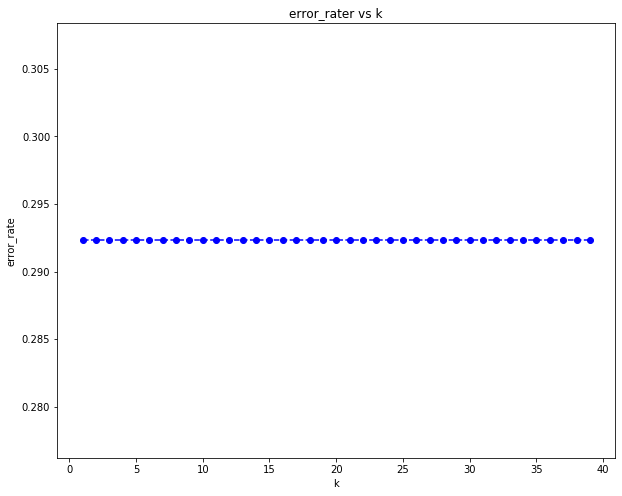

In [122]:
plt.figure(figsize=(10,8))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed',marker = 'o')

plt.title("error_rater vs k")
plt.xlabel("k")
plt.ylabel("error_rate")
